In [43]:
%matplotlib inline

user-defined LaTeX commands
$\newcommand{\Er}{\mathcal{E}}$
$\newcommand{\Xset}{\mathcal{X}}$
$\newcommand{\Yset}{\mathcal{Y}}$
$\newcommand{\L}{\mathcal{L}}$
$\newcommand{\l}{\mathcal{l}}$
$\newcommand{\pr}{\mathbb{P}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\D}{\mathbb{D}}$
$\newcommand{\w}{\mathbf{w}}$
$\newcommand{\X}{\mathbf{X}}$
$\newcommand{\y}{\mathbf{y}}$
$\newcommand{\x}{\mathbf{x}}$
$\newcommand{\J}{\mathbf{J}}$
$\newcommand{\I}{\mathbf{I}}$
$\newcommand{\X}{\mathbf{X}}$
$\newcommand{\S}{\mathbf{S}}$
$\newcommand{\e}{\mathbf{e}}$
$\newcommand{\C}{\mathbf{C}}$
$\newcommand{\K}{\mathbf{K}}$
$\newcommand{\R}{\mathbf{R}}$
$\newcommand{\v}{\mathbf{v}}$
$\newcommand{\phivec}{\boldsymbol{\phi}}$
$\newcommand{\sign}{\mathrm{sign}}$
$\newcommand{\z}{\mathbf{z}}$
$\newcommand{\Y}{\mathbf{Y}}$
$\newcommand{\Z}{\mathbf{Z}}$
$\newcommand{\a}{\mathbf{a}}$
$\newcommand{\W}{\mathbf{W}}$

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
from ggplot import *

In [46]:
from matplotlib import colors as clrs
from matplotlib.colors import ListedColormap

In [47]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [48]:
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import bernoulli
from scipy.stats import multivariate_normal
from scipy.stats import laplace

In [49]:
from sklearn.metrics.pairwise import check_pairwise_arrays
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import mahalanobis

In [50]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)#[:,0]
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.xlim(xx2.min(), xx2.max())
    # plot samples
    X_test, y_test = X[test_idx,:], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    # test samples highlight
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

### Interpolation problem
* Let $\x_i\in\mathbb{R}^{m_0}$, $i=1,2,\ldots,n$ be points from input space.
* Let $d_1,d_2,\ldots,d_n$ be desired responses for input points $\x_i$, $i=1,2,\ldots,n$
* Consider the map from $m_0$ dimensional input space to $\mathbb{R}^1$ response space: 
$\displaystyle{F:\mathbb{R}^{m_0}\rightarrow \mathbb{R}^1}$
* State the *interpolation problem*: 
    * given input points $\x_1,\ldots,\x_n$ and corresponding responses $d_1,\ldots,d_n$, 
    * find a function $\displaystyle{F:\mathbb{R}^{m_0}\rightarrow\mathbb{R}^1}$, that satisfies the strict interpolation condition:
$F(\x_i)=d_i$, $i=1,2,\ldots,n$
* Consider the function $F$ of the form:
$\displaystyle{F(\x)=\sum_{i=1}^nw_i\phi(\|\x-\x_i\|)}$, where $\phi_i(\x)=\phi(\|\x-\x_i\|)$, $i=1,2,\ldots,n$ 
are a set of arbitrary functions, called radial-basis functions.

In [51]:
def gauss_rbf(x, xi = None, gamma = None):
    x, xi = check_pairwise_arrays(x, xi)
    if gamma == None:
        gamma = 1.0 / x.shape[1]
    K = - gamma * euclidean_distances (x, xi, squared = True)
    return np.exp (K)

In [53]:
def inverse_rbf(x, xi = None, coef0 = 1.0):
    x, xi = check_pairwise_arrays(x, xi)
    return 1 / ((euclidean_distances(x, xi, squared=True) + coef0 ** 2) ** 0.5)

* Centers $\x_i$ in radial-basis functions are taken from known data points $\x_i\in\mathbb{R}^{m_0}$
* We get a system of equations, which can be written in matrix form: $\mathbf{\Phi}\w=\mathbf{d}$, where
$\mathbf{\Phi}=\{\phi_{ij}\}_{i,j=1}^n\in\mathbb{R}^{n\times n}$, and $\phi_{ij}=\phi(\|\x_i-\x_j\|)$,
$\w=(w_1,\ldots,w_n)$, $\mathbf{d}=(d_1,\ldots,d_n)$
* The solution $\w=\mathbf{\Phi}^{-1}\mathbf{d}$ can be guaranteed in case if $\mathbf{\Phi}$ is nonsingular. 
This is the case if $\mathbf{\Phi}$ is formed by radial-basis functions and input points are $\color{blue}{distinct}$.

In [54]:
def is_singular(A):
    n = np.min (A.shape)
    r = np.linalg.matrix_rank (A)
    if n == r:
        print ("nonsingular")
    else:
        print ("singular")

In practice we can get nearly-singular matrix, which will also spoil the situation. 
Let's take small number of points from moons dataset.

In [55]:
def step_function(x, margin = 0, label =[0, 1]):
    return np.where (x >= margin, label[1], label[0])

In [57]:
class RBFInterpolation(object):

    def __init__(self, rbf = 'gauss', gamma = None, coef0 = 1.0):
        self.rbf = rbf
        self.gamma = gamma
        self.coef0 = coef0

    def get_rbf(self, x, xi = None):
        x, xi = check_pairwise_arrays(x, xi)
        if self.rbf == 'gauss':
            K = gauss_rbf (x, xi, self.gamma)
        elif self.rbf == 'inverse':
            K = inverse_rbf (x, xi, self.coef0)
        return K

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.K = self.get_rbf(self.X)
        self.w = np.linalg.inv(self.K).dot(y)
        return self

    def predict(self, X):
        K = self.get_rbf (X, self.X)
        y = np.dot (K, self.w)
        return step_function (y, 0.5)

    def decision_function(self, X):
        K = self.get_rbf (X, self.X)
        y = np.dot (K, self.w)
        return y

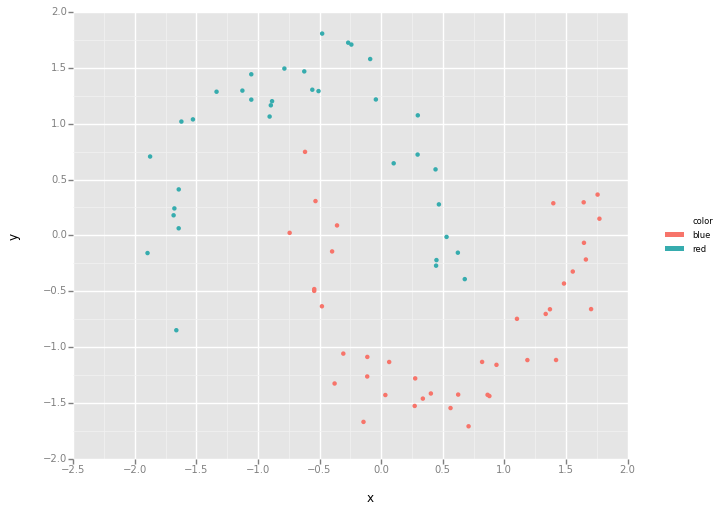

<ggplot: (-9223372036558124975)>

In [58]:
X, y = make_moons(noise=0.1, n_samples=100)
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.25)
dat = {'x':X_train.T[0], 'y':X_train.T[1], 'variable':y_train}
dat = pd.DataFrame (dat)
dat['color'] =['red' if variable == 0 else 'blue' for variable in dat['variable']]
ggplot(aes (x = 'x', y = 'y', group = 'variable', color = 'color'), data=dat) + geom_point ()

In [59]:
rbfi = RBFInterpolation(rbf='gauss', gamma=2)
rbfi.fit(X_train, y_train);

Check matrix $\Phi$ singularity:

In [60]:
is_singular(rbfi.K)

nonsingular


We can see, that for small number of points (nonsingular matrix $\Phi$) we obtain accurate model prediction 
for train inputs:

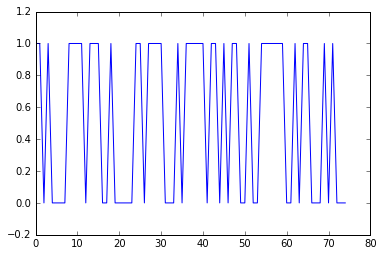

In [61]:
plt.plot(rbfi.decision_function(X_train));

We see accurate decision regions in this case

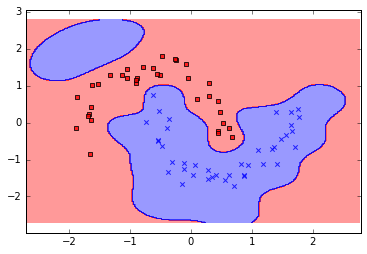

In [62]:
plot_decision_regions(X_train, y_train, rbfi)

Let's increase number of points in moons dataset:

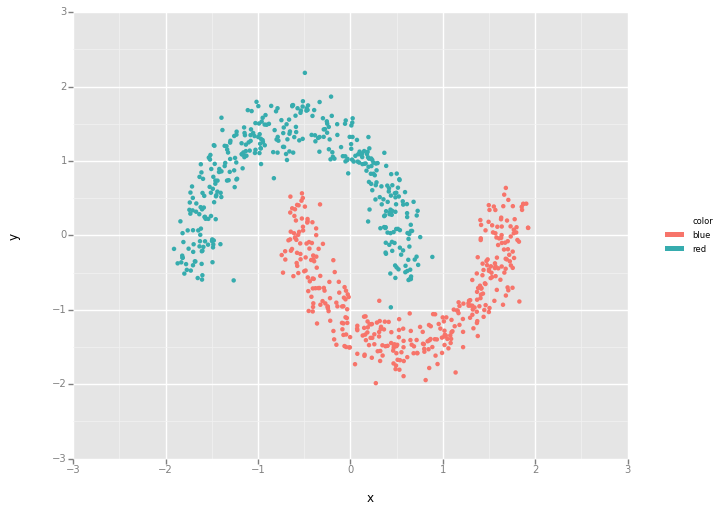

<ggplot: (-9223372036560995198)>

In [63]:
X, y = make_moons(noise=0.1, n_samples=1000)
X = scale(X)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.25)
dat = {'x':X_train.T[0], 'y':X_train.T[1], 'variable':y_train}
dat = pd.DataFrame (dat)
dat['color'] =['red' if variable == 0 else 'blue' for variable in dat['variable']]
ggplot(aes (x = 'x', y = 'y', group = 'variable', color = 'color'), data=dat) + geom_point ()

In [64]:
rbfi = RBFInterpolation(rbf='gauss', gamma=2)
rbfi.fit(X_train, y_train);

Check matrix $\Phi$ singularity:

In [65]:
is_singular(rbfi.K)

singular


Our model produces wrong outputs (due to inversion of singular matrix $\Phi$)

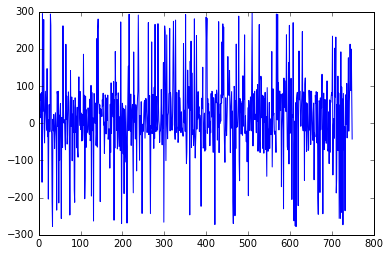

In [66]:
plt.plot(rbfi.decision_function(X_train));

Decision regions look like a mess

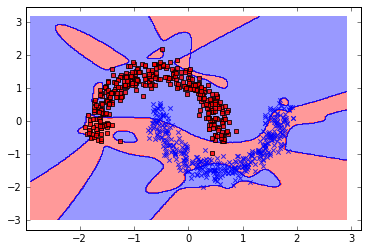

In [67]:
plot_decision_regions(X_train, y_train, rbfi)

How to fix the problem? Let's treat the problem as a Regularized Least-Squares problem:
$\displaystyle{\hat{\w}=\left(\Phi^T\Phi+\alpha\I_n\right)^{-1}\Phi^T\mathbf{d}}$, 
where $\alpha$ is a regularization parameter, which in our case will help to cope with $\Phi$ matrix singularity.

In [68]:
def MAP(X, y, alpha = 0.0):
    m = X.shape[1]
    I = np.identity (m)
    Rxx = np.dot (X.T, X)
    Ryx = np.dot (X.T, y)
    if alpha == 0.0:
        return np.dot (np.linalg.inv (Rxx), Ryx)
    elif alpha > 0.0:
        return np.dot (np.linalg.inv (Rxx + alpha * I), Ryx)

In [69]:
class RBFInterpolationRLS(object):

    def __init__(self, rbf = 'gauss', gamma = None, coef0 = 1.0, alpha = 0.0):
        self.rbf = rbf
        self.gamma = gamma
        self.coef0 = coef0
        self.alpha = alpha

    def get_rbf(self, x, xi = None):
        x, xi = check_pairwise_arrays (x, xi)
        if self.rbf == 'gauss':
            K = gauss_rbf (x, xi, self.gamma)
        elif self.rbf == 'inverse':
            K = inverse_rbf (x, xi, self.coef0)
        return K

    def fit(self, X, y):
        self.X = X
        self.y = y
        n = X.shape[0]
        self.K = self.get_rbf (self.X)
        self.w = MAP (self.K, self.y, self.alpha)
        return self

    def predict(self, X):
        K = self.get_rbf (X, self.X)
        y = np.dot (K, self.w)
        return step_function(y, 0.5)

    def decision_function(self, X):
        K = self.get_rbf (X, self.X)
        y = np.dot (K, self.w)
        return y

In [70]:
rbfi = RBFInterpolationRLS(rbf='gauss', gamma=2, alpha=0.1)
rbfi.fit (X_train, y_train);

Check matrix $\Phi$ singularity: 

In [71]:
is_singular(rbfi.K)

singular


Model output looks close to accurate (almost all values are close to expected 0 or 1)

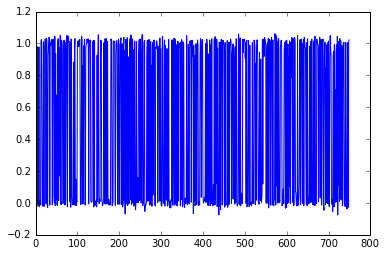

In [72]:
plt.plot(rbfi.decision_function(X_train));

Matrix $\Phi$ is singular, but we got accurate decision regions in this case.

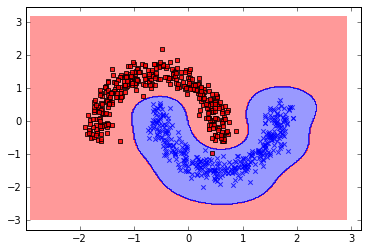

In [73]:
plot_decision_regions(X_train, y_train, rbfi)

### Radial-Basis-Function networks

Consider the network with the following architecture:
* **Input layer** consists of $m_0$ nodes, where $m_0$ is the dimensionality of input space.
* **Hidden layer** consists of $k$ units, each of which is described by radial basis function:
$\displaystyle{\phi_j(\x)=\phi(\|\x-\mathbf{c}_j\|)}$, where $\mathbf{c}_j$, $j=1,\ldots,k$ - is the center of radial basis function.
* **Output layer** consists of a single unit $\displaystyle{y=F(\x)=\sum_{j=1}^kw_j\phi_j(\x)}$

* Take Gaussian function as the radial basis function: 
$\displaystyle{\phi_j(\x)=\phi(\|\x-\mathbf{c}_j\|)=\exp\left(-\frac{1}{2\sigma_j^2}\|\x-\mathbf{c}_j\|^2\right)}$, $j=1,2,\ldots,k$
* The vital question for us now is how to determine centers for hidden layer? 
* Let's plug in previously discussed K-Means clustering algorithm as a first step to get centers (treating input space as unlabeled) and then apply RBF Network. 
* In this case $\mathbf{c}_j$ can be defined as cluster's $\C_j$ centroids: $\displaystyle{\hat{\mathbf{c}}_j=\frac{1}{k_j}\sum_{\x_i\in\C_j}\x_i}$, where $k_j=|\C_j|$ - number of input points, attributed to class $\C_j$.



In [38]:
class KMeans(object):

    def __init__(self, n_components = 2, epsilon=0.01):
        self.n_components = n_components
        self.mu =[]
        self.epsilon = epsilon

    def _get_random_point(self, X):
        return X[np.random.choice (X.shape[0], 1)[0]]

    def get_cluster_means(self, X, y):
        labs = np.arange (self.n_components)
        mu =[np.mean(X[np.where(y == lab)], axis = 0) if np.array(np.where(y == lab)).size > 0 else self._get_random_point(X) for lab in labs]
        return mu

    def update_encoder(self, X, mu):
        self.y = [np.argmin(euclidean_distances(x.reshape(1, -1), mu)) for x in X]
        return self.y
    
    def fit(self, X, y=None, n_iter=10):
        n = X.shape[0]
        labs = np.arange (self.n_components)
        self.y = np.random.choice(self.n_components, n)
        self.cost = []
        trace = []
        for i in range(n_iter):
            self.share = np.array([np.array(np.where(self.y == lab)).size for lab in labs])
            mu = self.get_cluster_means(X, self.y)
            trace.append(mu)
            self.cost.append(np.sum([(euclidean_distances(x.reshape(1, -1), mu)).min() for x in X]))
            self.y = self.update_encoder(X, mu)
            if i > 1 and np.abs(self.cost[-1] - self.cost[-2]) < self.epsilon:
                break;
        self.y = np.array(self.y)
        self.mu = mu
        self.trace = np.array(trace)
        return self

    def predict(self, X):
        return np.array (self.update_encoder (X, self.mu))

In [74]:
class RBFNetworkClassifier(object):

    def __init__(self, rbf = 'gauss', gamma = None, coef0 = 1.0, alpha = 0.0, n_centers = 5, n_iter = 5):
        self.rbf = rbf
        self.gamma = gamma
        self.coef0 = coef0
        self.alpha = alpha
        self.n_centers = n_centers
        self.n_iter = n_iter
        self.kmeans_ = KMeans (n_components = n_centers)

    def get_rbf(self, x, xi = None):
        x, xi = check_pairwise_arrays (x, xi)
        if self.rbf == 'gauss':
            K = gauss_rbf (x, xi, self.gamma)
        elif self.rbf == 'inverse':
            K = inverse_rbf (x, xi, self.coef0)
        return K

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.kmeans_.fit (self.X, n_iter = self.n_iter)
        self.d = self.kmeans_.y
        # calculate class mean values
        self.centers = np.array ([np.mean (self.X[np.where (self.d == lab)], axis = 0) for lab in np.unique (self.d)])
        self.K = self.get_rbf (self.centers, self.X)
        self.w = MAP (self.K.T, self.y, self.alpha)
        return self

    def predict(self, X):
        K = self.get_rbf(X, self.centers)
        y = np.dot (K, self.w)
        return step_function (y, 0.5)

    def decision_function(self, X):
        K = self.get_rbf (X, self.centers)
        y = np.dot (K, self.w)
        return y


In [81]:
clf = RBFNetworkClassifier(rbf='gauss', gamma=2.0, alpha=0.1, n_centers=30, n_iter=50)
clf.fit (X_train, y_train);

In [82]:
centers = pd.DataFrame(clf.centers)
centers.columns = ['x', 'y']

We can see centroids depicted with large blue points

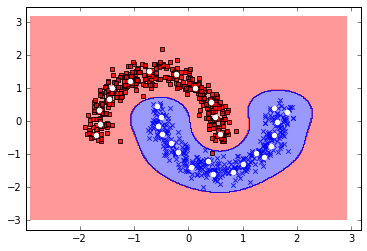

In [83]:
plot_decision_regions(X_train, y_train, clf)
plt.scatter(clf.centers.T[0],clf.centers.T[1],color='white');